# Analysis of Red Wine Dataset

### Importing required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Function that uses numpy method to read data from CSV file and convert it into 2D ndarray

In [2]:
def read_from_file(): 
    wines=np.genfromtxt('numpy_wine.csv',delimiter=";")
    wines=np.array(wines[1:]) 
    #print(data.shape)
    #print(type(data))
    return wines

### Function that calculates combined acid level by adding 'Fixed Acidity', 'Volatile Acidity', 'Citric Acid' i.e. column 1,2 and 3 respectively and sum of values is returned as 1D numpy ndarray

In [3]:
def get_combined_acidity(data):
    combined_acid=data[:,0]+data[:,1]+data[:,2]
    return combined_acid


### Function that returns high quality wines as subset of wines of quality >= high_quality_baseline. Last column of the dataset is quality(1-10). High quality wines are returned as 1D numpy ndarray.

In [4]:
def get_high_quality_wines(data,high_quality_baseline=8):
    high_quality_wines=[]
    for row in data:
        if row[11]>=high_quality_baseline:
            high_quality_wines.append(row)
    
    high_quality_wines=np.array(high_quality_wines)
    return high_quality_wines

### Function that calculates the standard deviation of each column and return index and maximum standard deviation of the column as tuple

In [5]:
def max_std_dev(data):
    index=0
    max_std=0
    for col in range(12):
        column=data[:,col]
        stddev=np.ndarray.std(column)
        if max_std<stddev:
            max_std=stddev
            index=col
    return (index,max_std)

### Function that calculates the standard deviation of each column and return index and minimum standard deviation of the column as tuple

In [6]:
def min_std_dev(data):
    index=0
    min_std=100
    for col in range(12):
        column=data[:,col]
        stddev=np.ndarray.std(column)
        if min_std>stddev:
            min_std=stddev
            index=col
    return (index,min_std)

### Function that plots the standard deviation of each column and maximum and minimum standard deviation

In [7]:
def make_plots(data):
    std=[]
    for col in range(12):
        column=data[:,col]
        stddev=np.ndarray.std(column)
        std.append(stddev)
    col=np.arange(0,12)
    std=np.array(std)
    
    max_ind,max_std=max_std_dev(data)
    min_ind,min_std=min_std_dev(data)
    
    fig=plt.figure(figsize=(10, 10 ))
    fig.add_subplot(2,2 , 1) 
    plt.plot(std, '-ro',markevery=[max_ind],label='MAXIMUM')
    plt.legend(loc='best')
    
    fig.add_subplot(2,2 , 2)
    plt.plot(std, '-gD',markevery=[min_ind],label='MINIMUM')
    plt.legend(loc='upper right', shadow=True)
    plt.savefig('numpy_wine_min_max_std.png')

### Main function that merges all the above functionality

In [8]:
def main():
    colname=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
    data=read_from_file()
    combined_acid_level=get_combined_acidity(data)
    print("Minimum combined acidity is: ",np.amin(combined_acid_level))
    print("Maximum combined acidity is: ",np.amax(combined_acid_level))
    print()
    high_quality_baseline=int(input("Enter baseline for quality(1-10): "))
    high_quality_wines=get_high_quality_wines(data,high_quality_baseline)
    print("Number of wines with quality >=",high_quality_baseline,":",high_quality_wines.shape[0])
    print()
    max_ind,max_std=max_std_dev(data)
    min_ind,min_std=min_std_dev(data)
    print("The column with largest standard deviation is:",colname[max_ind])
    print("The standard deviation for this column is:",max_std)
    print()
    print("The column for smallest standard deviation is:",colname[min_ind])
    print("The standard deviation is:",min_std)
    make_plots(data)
    

Minimum combined acidity is:  5.27
Maximum combined acidity is:  17.045

Enter baseline for quality(1-10): 7
Number of wines with quality >= 7 : 217

The column with largest standard deviation is: total sulfur dioxide
The standard deviation for this column is: 32.88503665178374

The column for smallest standard deviation is: density
The standard deviation is: 0.0018867437008323914


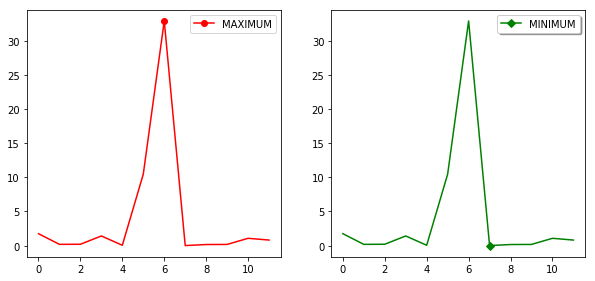

In [9]:
main()